# Drugs Classification Model

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Dataset

In [ ]:
data = pd.read_csv("drug200.csv", encoding="latin-1")

data.info(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Data Preprocessing

In [39]:
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['BP'] = data['BP'].map({'HIGH': 0, 'LOW': 1, 'NORMAL': 2})
data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 0, 'NORMAL': 1})

X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,0,25.355,DrugY
1,47,0,1,0,13.093,drugC
2,47,0,1,0,10.114,drugC
3,28,1,2,0,7.798,drugX
4,61,1,1,0,18.043,DrugY


# Split the Data into Training and Testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [41]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predicting the Data

In [42]:
y_pred = forest.predict(X_test)

# Conduct Accuracy and Report

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 100.00
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Evaluating the Model

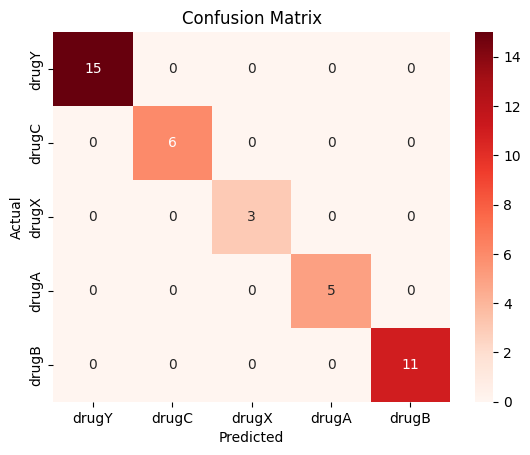

In [51]:
matrix = confusion_matrix(y_test, y_pred)
class_name = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=class_name, yticklabels=class_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Prediction

In [50]:
columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

#         Sex (M = 0, F = 1)
#          BP (HIGH = 0, LOW = 1, NORMAL = 2)
# Cholesterol (HIGH = 0, NORMAL = 1)
    
test_data = pd.DataFrame([[47,0,1,0,10.114]], columns=columns)

prediction = forest.predict(test_data)

print(f"Predicted Drug: {prediction[0].lower()}")

Predicted Drug: drugC
